In [1]:
# Importing necessary librarires for data wrangling

import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [3]:
# Read in the data set
df_sr = pd.read_csv('https://cocl.us/datascience_survey_data',index_col = 0)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
# View top 5 rows of the data 
df_sr.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [5]:
#View the dimensions of the data
print(df_sr.shape)

(6, 3)


In [6]:
# View additional information of the data
df_sr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Big Data (Spark / Hadoop) to Machine Learning
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Very interested      6 non-null      int64
 1   Somewhat interested  6 non-null      int64
 2   Not interested       6 non-null      int64
dtypes: int64(3)
memory usage: 192.0+ bytes


In [7]:
# Load in the necessary libraries for plotting.

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [8]:
# Sorting the values based on Very interested
df_sr.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)

# Taking the percentage of the responses and rounding it to 2 decimal places 
df_sr = round((df_sr/2233)*100,2)

# View top 5 rows of the data 
df_sr.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09


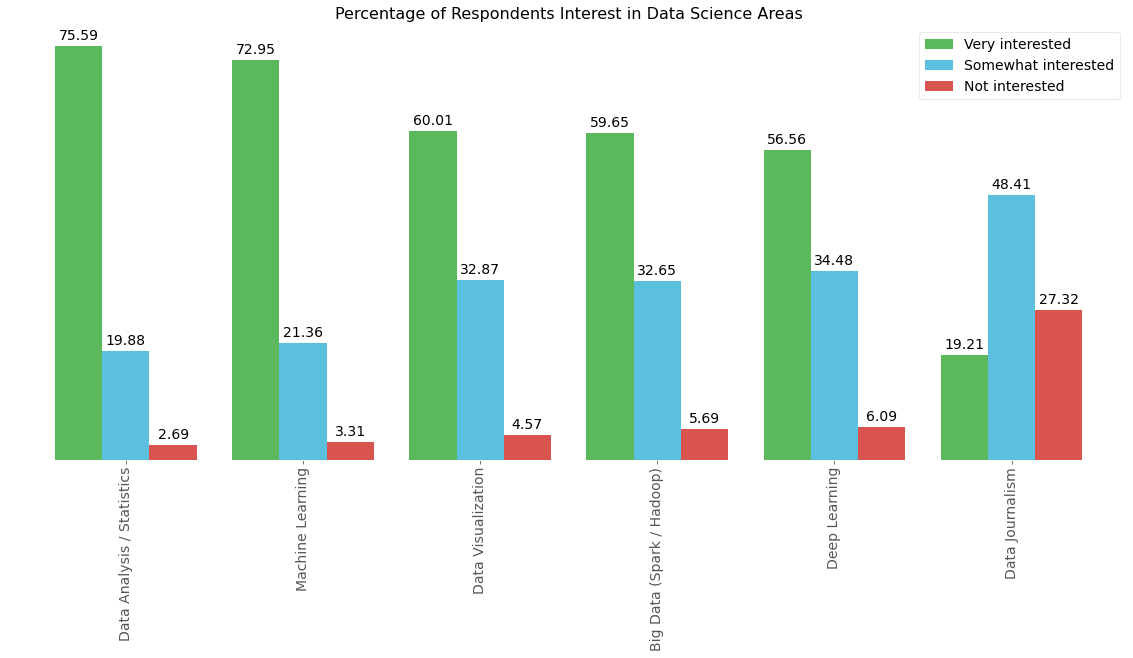

In [10]:
# Plotting
ax = df_sr.plot(kind='bar', 
                figsize=(20, 8),
                rot=90,color = ['#5cb85c','#5bc0de','#d9534f'],
                width=.8,fontsize=14)


# Setting plot title
ax.set_title('Percentage of Respondents Interest in Data Science Areas',fontsize=16)

# Setting figure background color
ax.set_facecolor('white')

# setting legend font size
ax.legend(fontsize=14,facecolor = 'white') 

# Removing the Border 
ax.get_yaxis().set_visible(False)

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )
plt.show()

In [ ]:
# Read in the data set
df_sfc = pd.read_csv('https://ibm.box.com/shared/static/nmcltjmocdi8sd5tk93uembzdec8zyaq.csv')

print('Dataset downloaded and read into a pandas dataframe!')

In [ ]:
df_sfc.head()

In [ ]:
df_sfc.info()

In [ ]:
# Assigning a variable with the total counts of each Neighborhood
df_neig= df_sfc['PdDistrict'].value_counts()

# Assigning the values of the variable to a Pandas Data frame
df_neig1 = pd.DataFrame(data=df_neig.values, index = df_neig.index, columns=['Count'])

# Reindexing the data frame to the requirement
df_neig1 = df_neig1.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

# Resetting the index
df_neig1 = df_neig1.reset_index()

# Assignming the column names
df_neig1.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

# View the data frame
df_neig1

In [ ]:
# Load the packages for creating the Choropleth map
import folium

In [ ]:
# Read in the GeoJSON file
geojson = r'https://cocl.us/sanfran_geojson'

# Create the map centering San Fransico
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

In [ ]:
# Display the map
sf_map.choropleth(geo_data=geojson,
                  data=df_neig1,
                  columns=['Neighborhood', 'Count'],
                  key_on='feature.properties.DISTRICT',
                  fill_color='YlOrRd', 
                  fill_opacity=0.7, 
                  line_opacity=0.2,
                  legend_name='Crime Rate in San Francisco'
)

sf_map